In [136]:
#Import some useful modules for upcoming works.
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np


df = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/CapstoneProject/Capstone1-HR-Employee-Attrition.csv')

In [137]:
# Delete columns having the value of '1 or any same values for all observation'. 
cols = ["Over18", "StandardHours", "EmployeeCount"]
for i in cols:
    del df[i]

In [138]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [139]:
print("Total records: ", len(df))
print("Records for employees left: ", sum(df.Attrition == 'Yes'))
print("Records for employees stayed: ", sum(df.Attrition == 'No'))

('Total records: ', 1470)
('Records for employees left: ', 237)
('Records for employees stayed: ', 1233)


In [140]:
#Create a new data set called 'df_yes' by filtering the data set 'df' where Attrition='Yes' 
df_yes=df[df.Attrition == 'Yes']
df_yes.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [141]:
#Calculate mean hourly rate for each department:
df.groupby('Department')[['HourlyRate']].mean()

,HourlyRate
Department,
Human Resources,64.301587
Research & Development,66.167534
Sales,65.520179


Hourly Rate is not good indicator to make an impact among departments in terms of the reason for employee attrition. 

In [142]:
#Create a new data set called 'df_yes' by filtering the data set 'df' where Attrition='Yes' 
df_no=df[df.Attrition == 'No']
df_no.columns

Index([u'Age', u'Attrition', u'BusinessTravel', u'DailyRate', u'Department',
       u'DistanceFromHome', u'Education', u'EducationField', u'EmployeeNumber',
       u'EnvironmentSatisfaction', u'Gender', u'HourlyRate', u'JobInvolvement',
       u'JobLevel', u'JobRole', u'JobSatisfaction', u'MaritalStatus',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager'],
      dtype='object')

# Is Age a significant factor for an employee of stay or left?

In [93]:
two_sample = st.ttest_ind(df_no['Age'], 
                          df_yes['Age'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is 6.179 and the p-value is 0.00000000.


# Is distance from home a significant factor for an employee of stay or left?

In [94]:
two_sample = st.ttest_ind(df_no['DistanceFromHome'], 
                          df_yes['DistanceFromHome'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is -2.995 and the p-value is 0.00279306.


# Is Total Working Years a significant factor for an employee who was in attrition or not?

In [95]:
two_sample = st.ttest_ind(df_no['TotalWorkingYears'], 
                          df_yes['TotalWorkingYears'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is 6.652 and the p-value is 0.00000000.


# Is Total Years Since Last Promotion a significant factor for an employee who was in attrition or not?

In [96]:
two_sample = st.ttest_ind(df_no['YearsSinceLastPromotion'], 
                          df_yes['YearsSinceLastPromotion'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is 1.266 and the p-value is 0.20578996.


In [143]:
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition']) # Encoded to Yes=1, No=0
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


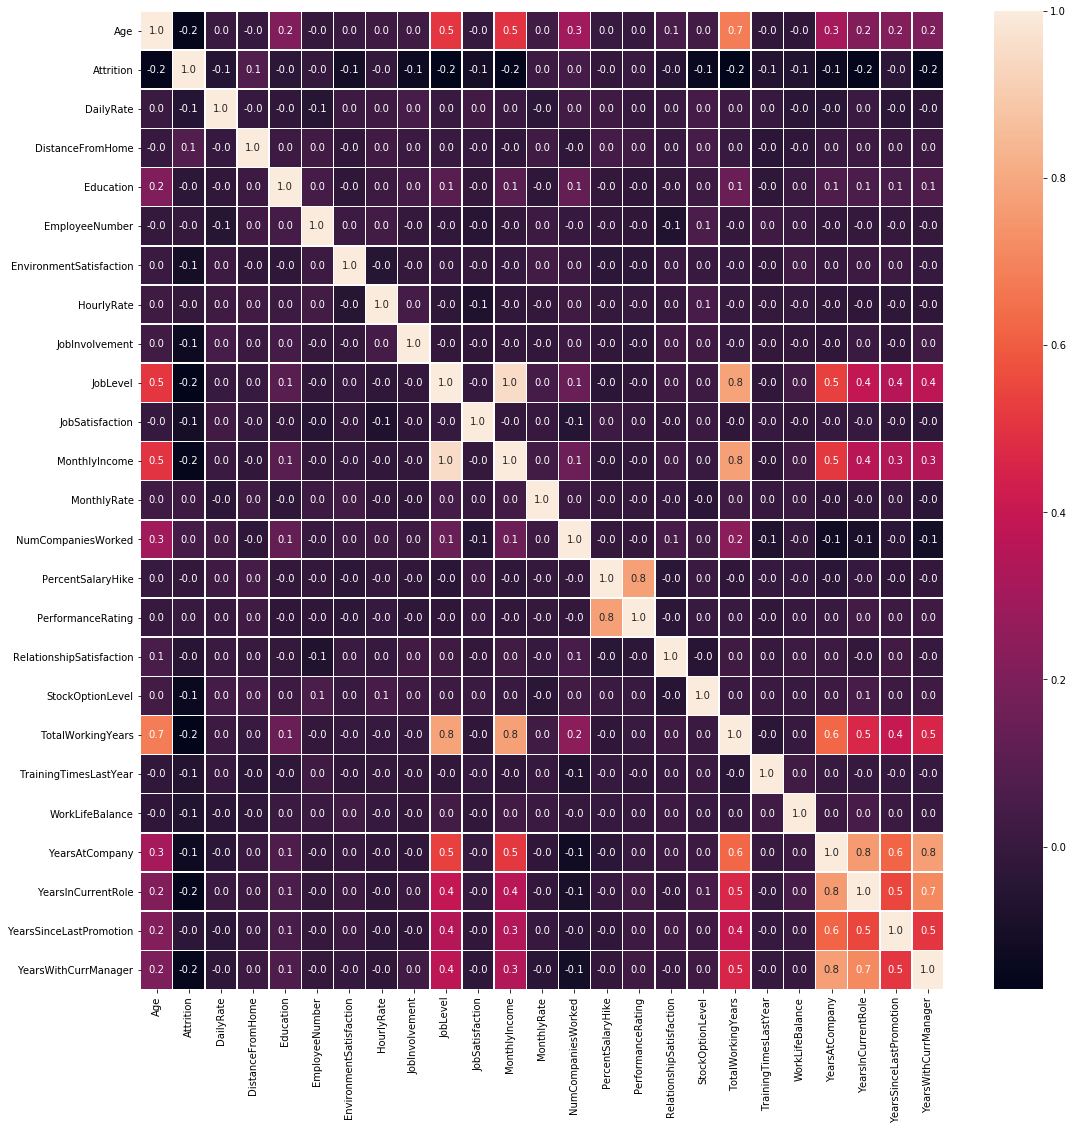

In [144]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#Age highly correlated with TotalWorkingYears(=0.7)

#JobLevel highly correlated with TotalWorkingYears(=0.7)

#JobLevel highly correlated with MonthlyIncome(=1.0)

#MonthlyIncome highly correlated with TotalWorkingYears(=0.8)

#PercentSalaryHike highly correlated with PerformanceRating(=0.8)

#YearsAtCompany highly correlated with YearsInCurrentRole and YearsWithCurrManager (=0.8)

#YearsAtCompany highly correlated with YearsSinceLastPromotion(=0.8)

#YearsCurrentRole highly correlated with YearsWithCurrManager(=0.7)